In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jaxquantum.circuits as jqtc
from jax import jit, grad
import jax.numpy as jnp
from math import prod
import matplotlib.pyplot as plt

import jax
import optax
import functools

In [3]:
def prep_state(beta):
    N = 20
    reg = jqtc.Register([2,N])
    cirq = jqtc.Circuit.create(reg, layers=[])

    # Pi/2 Pulse
    cirq.append(jqtc.H(), 0)

    # CD
    cirq.append(jqtc.CD(N, beta),[0,1])

    # Measure 
    cirq.append(MX_plus(), 0)

    initial_state = jqt.ket2dm(jqt.basis(2,0) ^ jqt.basis(N,0))
    res = jqtc.simulate(cirq, initial_state, mode="kraus")

    return res[-1][-1].unit()

def state_fid(beta):
    N = 20
    cat_state = (jqt.coherent(N,-beta/2) + jqt.coherent(N,beta/2)).unit()
    prepared_state = jqt.ptrace(prep_state(beta),1)
    return jqt.overlap(cat_state, prepared_state)

In [6]:
state_fid(2)

AssertionError: Data shape should be consistent with dimensions.

Text(0, 0.5, 'Im[α]')

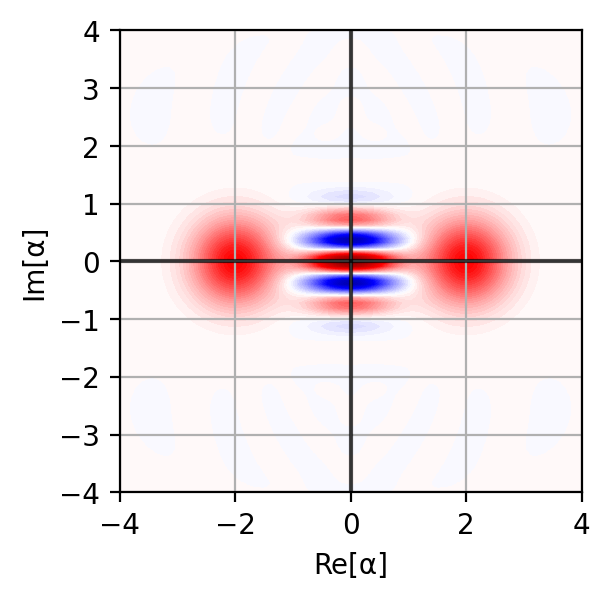

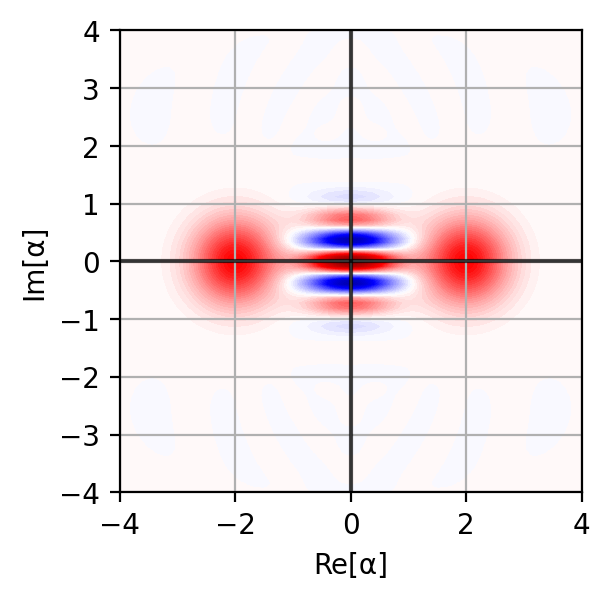

In [5]:
# start with a dm instead

N = 20
beta = 4
state = (jqt.coherent(N,-beta/2) + jqt.coherent(N,beta/2)).unit()
pts = jnp.linspace(-4,4, 101)
ax = jqt.plot_wigner(state, pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")


state = prep_state(4)
pts = jnp.linspace(-4,4, 101)
ax = jqt.plot_wigner(jqt.ptrace(state,1), pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")